In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from readCanLitefileUtils import *
from calibUtils import *

In [ ]:
# define the inputs


##SN04 

#file 1 (DACset 0x000)
file_DACset000 = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacset000.csv'

#file 2 (DACset 0x3FF)
file_DACset3FF = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacset3FF.csv'

#file 3 (DACset 0xCFF)
file_DACsetCFF = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacsetCFF.csv'

#file 4 (DACset 0xFFF)
file_DACsetFFF = './files/SN04_calib-test/21-05-18_121010_validcalibparam_SN04_dacsetFFF.csv'


DMM_000 = [108.75, 108.757, 108.742, 108.746, 108.745, 108.745, 
          108.737, 108.743, 108.747, 108.717, 108.727, 108.757]

DMM_3FF = [110.638, 110.643, 110.631, 110.635, 110.636, 110.637,
          110.627, 110.631, 110.640, 110.602, 110.619, 110.651]

DMM_CFF = [114.908, 114.915, 114.895, 114.895, 114.896, 114.892,
          114.892, 114.897, 114.902, 114.872, 114.882, 114.922]


DMM_FFF = [116.329, 116.334, 116.315, 116.319, 116.322, 116.313,
          116.310, 116.317, 116.322, 116.293, 116.302, 116.343]


MM_CFF = [114.908, 114.915, 114.895, 114.895, 114.896, 114.892,
          114.892, 114.897, 114.902, 114.872, 114.882, 114.922]


DMM_FFF = [116.329, 116.334, 116.315, 116.319, 116.322, 116.313,
          116.310, 116.317, 116.322, 116.293, 116.302, 116.343]


values = ['ADC000', 'ADC3FF', 'ADCCFF', 'ADCFFF']

In [3]:
DACset000, ADC000 = GetADCvalues(file_DACset000)

DACset3FF, ADC3FF = GetADCvalues(file_DACset3FF)

DACsetCFF, ADCCFF = GetADCvalues(file_DACsetCFF)

DACsetFFF, ADCFFF = GetADCvalues(file_DACsetFFF)



In [4]:
df = pd.DataFrame(list(zip(ADC000, DMM_000, ADC3FF, DMM_3FF, ADCCFF, DMM_CFF, ADCFFF, DMM_FFF)), 
    columns = ['ADC000', 'DMM000' ,  'ADC3FF', 'DMM3FF', 'ADCCFF', 'DMMCFF', 'ADCFFF', 'DMMFFF'])
df

,ADC000,DMM000,ADC3FF,DMM3FF,ADCCFF,DMMCFF,ADCFFF,DMMFFF
0,e536,108.750,e91f,110.638,f223,114.908,f521,116.329
1,e532,108.757,e92c,110.643,f22d,114.915,f52a,116.334
2,e52b,108.742,e927,110.631,f224,114.895,f523,116.315
3,e52f,108.746,e92a,110.635,f225,114.895,f524,116.319
4,e52c,108.745,e928,110.636,f223,114.896,f524,116.322
5,e52e,108.745,e92b,110.637,f224,114.892,f521,116.313
6,e529,108.737,e925,110.627,f222,114.892,f520,116.310
7,e52c,108.743,e927,110.631,f225,114.897,f523,116.317
8,e51e,108.747,e931,110.640,f235,114.902,f530,116.322
9,e51f,108.717,e918,110.602,f217,114.872,f515,116.293


In [5]:
df_calibparam = pd.read_csv('./calibDB/calib_biasV_SN04_v6_forcheck.csv',delimiter=',') 
df_calibparam.drop('Unnamed: 0', inplace=True, axis=1)


In [6]:
def compute_CalibBiasV(df, df_calibparam, values):
    df = df.copy()
    a_coeff = 1.8535e-3
    b_coeff = 0
    LSBres = 1.8535e-3


    for val in values:
        #print(val)
        val_calib = val + '_calib'
    
        
        #compute ADC calibrated value in dec
        
        df[val] = df[val].apply(lambda x: int(x,16) )
        #df[val_calib] = ( df[val] + df_calibparam['Offset_Sig BiasV']) * (df_calibparam['Gain_Usig BiasV'] /32768) * a_coeff + b_coeff
        df[val_calib] = df[val] * 1.8535e-3
       

        #compare with the DMM value
        tmp_DMMlabel = val.replace('ADC', 'DMM')
        val_err = val + 'err'
        df[val_err] = df[tmp_DMMlabel]-df[val_calib]

        
        #compute error 
        val_sig = val + 'sigma'
        df[val_sig] = df[val_err]/LSBres
        
        
    return df
    

In [7]:
df_aftercalibtest = compute_CalibBiasV(df, df_calibparam, values)
df_aftercalibtest.reset_index(inplace=True)
df_aftercalibtest  

,index,ADC000,DMM000,ADC3FF,DMM3FF,ADCCFF,DMMCFF,ADCFFF,DMMFFF,ADC000_calib,...,ADC000sigma,ADC3FF_calib,ADC3FFerr,ADC3FFsigma,ADCCFF_calib,ADCCFFerr,ADCCFFsigma,ADCFFF_calib,ADCFFFerr,ADCFFFsigma
0,0,58678,108.750,59679,110.638,61987,114.908,62753,116.329,108.759673,...,-5.218775,110.615026,0.022974,12.394659,114.892905,0.015096,8.144322,116.312685,0.016315,8.801996
1,1,58674,108.757,59692,110.643,61997,114.915,62762,116.334,108.752259,...,2.557864,110.639122,0.003878,2.092258,114.911440,0.003561,1.920960,116.329367,0.004633,2.499595
2,2,58667,108.742,59687,110.631,61988,114.895,62755,116.315,108.739284,...,1.465066,110.629854,0.001146,0.618020,114.894758,0.000242,0.130564,116.316392,-0.001392,-0.751281
3,3,58671,108.746,59690,110.635,61989,114.895,62756,116.319,108.746698,...,-0.376855,110.635415,-0.000415,-0.223901,114.896611,-0.001611,-0.869436,116.318246,0.000754,0.406798
4,4,58668,108.745,59688,110.636,61987,114.896,62756,116.322,108.741138,...,2.083626,110.631708,0.004292,2.315619,114.892905,0.003096,1.670084,116.318246,0.003754,2.025357
5,5,58670,108.745,59691,110.637,61988,114.892,62753,116.313,108.744845,...,0.083626,110.637268,-0.000268,-0.144861,114.894758,-0.002758,-1.487996,116.312685,0.000315,0.169679
6,6,58665,108.737,59685,110.627,61986,114.892,62752,116.310,108.735577,...,0.767467,110.626147,0.000853,0.459941,114.891051,0.000949,0.512004,116.310832,-0.000832,-0.448880
7,7,58668,108.743,59687,110.631,61989,114.897,62755,116.317,108.741138,...,1.004586,110.629854,0.001146,0.618020,114.896611,0.000389,0.209603,116.316392,0.000608,0.327758
8,8,58654,108.747,59697,110.640,62005,114.902,62768,116.322,108.715189,...,17.162665,110.648389,-0.008389,-4.526302,114.926267,-0.024267,-13.092797,116.340488,-0.018488,-9.974643
9,9,58655,108.717,59672,110.602,61975,114.872,62741,116.293,108.717042,...,-0.022930,110.602052,-0.000052,-0.028055,114.870662,0.001338,0.721608,116.290443,0.002557,1.379282


Text(0, 0.5, 'Error/LSB')

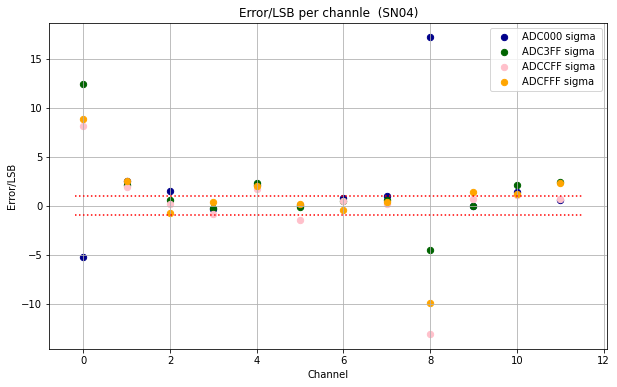

In [8]:
plt.figure(figsize=(10,6))

ax = plt.gca()


ax = df_aftercalibtest.plot.scatter(x='index', y='ADC000sigma', color="DarkBlue", label="ADC000 sigma", ax=ax, marker = 'o', s=40)
ax = df_aftercalibtest.plot.scatter(x='index', y='ADC3FFsigma', color="DarkGreen", label="ADC3FF sigma ", ax=ax, marker = 'o', s=40)
ax = df_aftercalibtest.plot.scatter(x='index', y='ADCCFFsigma', color="Pink", label="ADCCFF sigma", ax=ax, marker = 'o', s=40 )
ax = df_aftercalibtest.plot.scatter(x='index', y='ADCFFFsigma', color="Orange", label="ADCFFF sigma", ax=ax, marker = 'o', s=40 )

ax = plt.hlines(1, -0.2, 11.5, linestyles='dotted', color='red')
ax = plt.hlines(-1, -0.2, 11.5, linestyles='dotted', color='red')

plt.grid(b=True)
plt.title('Error/LSB per channle  (SN04)')
plt.xlabel('Channel')
plt.ylabel('Error/LSB')
